In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import sys 
sys.path.append('./models/')
from Model import Model 
from exponential_regression import exponential_func, ExponentialRegression

Importing data

In [4]:
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

Fitting the data on 15 days: 

[ 4.95903687e-03  3.78817385e-01 -7.67237876e+00]


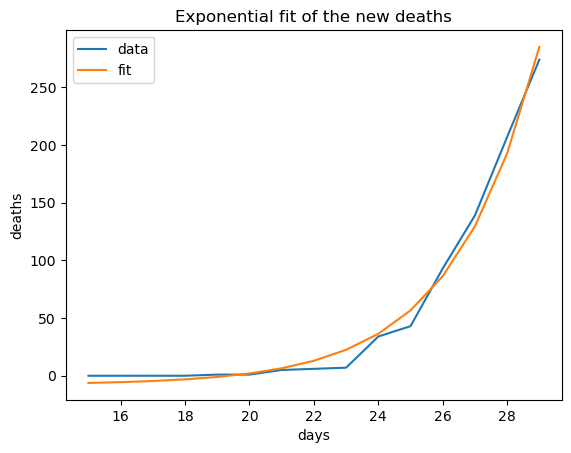

In [8]:
min=15
max=30
interval=[i for i in range(min,max)]
p, cov =curve_fit(exponential_func, dates_of_pandemic[interval], new_deaths[interval], p0=[ 1, 1, 1], maxfev = 10000)
print(p)
plt.plot(dates_of_pandemic[interval], new_deaths[interval], label='data')
plt.plot(dates_of_pandemic[interval], exponential_func(dates_of_pandemic[interval], *p), label='fit')
plt.legend()
plt.xlabel('days')
plt.ylabel('deaths')
plt.title('Exponential fit of the new deaths')
plt.show()

We test the model to make predictions 7 days ahead. The only method that gives coherent confidence intervals is the covariance one. 

Good predictions on the train set but it explodes when the goal is to predict new cases. 

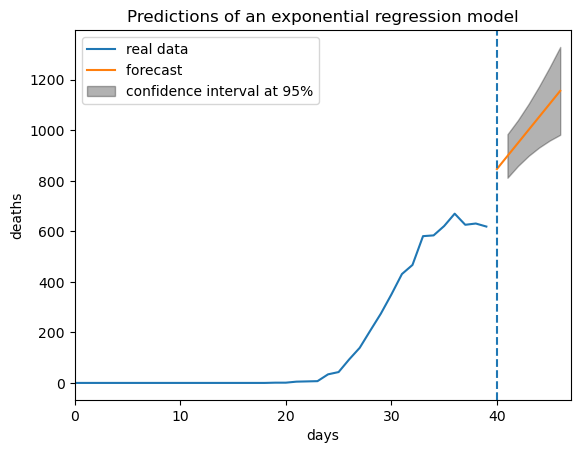

In [13]:
mymodel=ExponentialRegression()
split=40
mymodel.train(dates_of_pandemic[:split], new_deaths[:split])
mymodel.plot(7, 0.05, title='Predictions of an exponential regression model', xlabel='days', ylabel='deaths')